In [223]:
from collections import OrderedDict
from bs4 import BeautifulSoup
from IPython.display import Image
from itertools import cycle
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords # Import the stop word list
from scipy import interp
from sklearn import cross_validation, datasets, linear_model, metrics, svm, datasets, tree
from sklearn.cluster import MeanShift
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from statistics import mode, mean, median
import graphviz as gv
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import pydotplus
import re

import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols

In [224]:
df = pd.read_csv('admission_minogue-4.csv')
df

,Term,Level,Prospect,Applicant,Admit,Deposit,Enroll,Gender,BIRTHDATE,Ethnicity,...,PROG_ACTION,PROG_REASON,ApplicationDate,1stGeneration,Convert_GPA_Fix,FIN_AID_INTEREST,Rank,Size,Percentile,Pell
0,900,F,True,True,False,False,False,F,09-Jul-50,White,...,WADM,CANC,07-Oct-11,False,NaN,Y,NaN,NaN,NaN,False
1,900,F,True,True,False,False,False,U,28-Nov-88,Multiracial,...,DENY,INC,20-Apr-12,False,NaN,N,NaN,NaN,NaN,False
2,900,F,True,True,False,False,False,M,18-Jul-87,Hispanic,...,APPL,INC,14-Aug-12,False,NaN,N,NaN,NaN,NaN,False
3,900,F,True,True,False,False,False,M,27-Aug-93,White,...,DENY,INC,23-Nov-11,False,4.100,N,0.0,0.0,0.0,False
4,900,F,True,True,False,True,False,M,15-Jun-89,Hispanic,...,DENY,INC,06-Jul-12,True,NaN,Y,NaN,NaN,NaN,True
5,900,F,True,True,False,False,False,U,16-Dec-88,Asian/Pacific Islander,...,DENY,INC,21-Nov-11,False,NaN,Y,NaN,NaN,NaN,False
6,900,F,True,True,False,False,False,U,10-Jul-89,Hispanic,...,DENY,INC,30-Aug-11,False,2.538,N,0.0,0.0,0.0,False
7,900,F,True,True,False,False,False,M,28-May-90,White,...,DENY,COUR,27-Feb-12,False,2.730,N,0.0,0.0,0.0,False
8,900,F,True,True,False,False,False,F,19-Jul-70,Black,...,DENY,INC,26-Mar-12,False,NaN,Y,NaN,NaN,NaN,False
9,900,F,True,True,False,False,False,M,27-Nov-93,Black,...,WADM,INC,17-Oct-11,False,2.250,Y,0.0,0.0,0.0,False


In [225]:
print(list(df))
for col in df:
    print("Column:", col, "; Unique Values: ",df[col].unique())

['Term', 'Level', 'Prospect', 'Applicant', 'Admit', 'Deposit', 'Enroll', 'Gender', 'BIRTHDATE', 'Ethnicity', 'Region Description', 'Age', 'Age Category Description', 'ACT Category Description', 'ACTC', 'ACTE', 'ACTM', 'ACTR', 'ACTS', 'ACT_Test_Date', 'College', 'Major', 'Decision', 'GeneralDecision', 'PROG_ACTION', 'PROG_REASON', 'ApplicationDate', '1stGeneration', 'Convert_GPA_Fix', 'FIN_AID_INTEREST', 'Rank', 'Size', 'Percentile', 'Pell']
Column: Term ; Unique Values:  [900]
Column: Level ; Unique Values:  ['F' 'T' 'CN' 'M' 'S']
Column: Prospect ; Unique Values:  [ True]
Column: Applicant ; Unique Values:  [ True False]
Column: Admit ; Unique Values:  [False  True]
Column: Deposit ; Unique Values:  [False  True]
Column: Enroll ; Unique Values:  [False  True]
Column: Gender ; Unique Values:  ['F' 'U' 'M']
Column: BIRTHDATE ; Unique Values:  ['09-Jul-50' '28-Nov-88' '18-Jul-87' ... '22-Sep-95' '11-Feb-95'
 '13-Aug-95']
Column: Ethnicity ; Unique Values:  ['White' 'Multiracial' 'Hispani

In [226]:
df.isna().sum()

Term                           0
Level                          0
Prospect                       0
Applicant                      0
Admit                          0
Deposit                        0
Enroll                         0
Gender                         0
BIRTHDATE                      6
Ethnicity                      0
Region Description             0
Age                            6
Age Category Description       0
ACT Category Description       0
ACTC                        4991
ACTE                        4996
ACTM                        4996
ACTR                        4999
ACTS                        4999
ACT_Test_Date               4991
College                      105
Major                         98
Decision                      98
GeneralDecision               98
PROG_ACTION                   98
PROG_REASON                 1651
ApplicationDate               98
1stGeneration                  0
Convert_GPA_Fix             2174
FIN_AID_INTEREST              99
Rank      

In [227]:
#null_columns=df.columns[df.isnull().any()]
#print(df[df["Age"].isnull()][null_columns])
#print(df[df["Decision"].isnull()][null_columns])
print(df.loc[df['Admit'] == True].count())

Term                        11305
Level                       11305
Prospect                    11305
Applicant                   11305
Admit                       11305
Deposit                     11305
Enroll                      11305
Gender                      11305
BIRTHDATE                   11305
Ethnicity                   11305
Region Description          11305
Age                         11305
Age Category Description    11305
ACT Category Description    11305
ACTC                         9427
ACTE                         9426
ACTM                         9425
ACTR                         9422
ACTS                         9422
ACT_Test_Date                9427
College                     11299
Major                       11305
Decision                    11305
GeneralDecision             11305
PROG_ACTION                 11305
PROG_REASON                  9757
ApplicationDate             11305
1stGeneration               11305
Convert_GPA_Fix             11292
FIN_AID_INTERE

In [228]:
gpaDF = df[['ACTC','Convert_GPA_Fix']].loc[~df.ACTC.isnull() & ~df.Convert_GPA_Fix.isnull()]
#print(test)
gpaDF['Convert_GPA_Fix'] = round(gpaDF['Convert_GPA_Fix'],1)
#print(test)
#ACTlookup = pd.DataFrame({'Convert_GPA_Fix': gpaDF['Convert_GPA_Fix'].unique()})
#print(ACTlookup)
gpaList = gpaDF['Convert_GPA_Fix'].unique()
print(gpaList)

[2.7 2.2 2.6 3.5 3.2 5.8 4.5 4.1 3.1 4.2 5.2 4.3 2.8 4.7 0.  2.5 3.7 3.6
 3.  3.3 4.  3.9 2.1 3.4 3.8 4.8 4.6 2.3 4.4 2.9 1.9 4.9 5.5 5.  2.4 2.
 5.1 5.6 5.4 1.7 1.6 1.8 1.5 1.4 5.7 1.3 1.2]


In [229]:
#for row in ACTlookup.itertuples():
for gpa in gpaList:
    ACTmode = round(median(gpaDF['ACTC'].loc[gpaDF.Convert_GPA_Fix == gpa]),0)
    print("GPA:",gpa,"; ACTmode:",ACTmode)
    #ACTlookup['ACTmode'].loc[ACTlookup.Convert_GPA_Fix == GPA] = ACTmode
#print(ACTlookup)

GPA: 2.7 ; ACTmode: 22.0
GPA: 2.2 ; ACTmode: 20.0
GPA: 2.6 ; ACTmode: 21.0
GPA: 3.5 ; ACTmode: 24.0
GPA: 3.2 ; ACTmode: 23.0
GPA: 5.8 ; ACTmode: 24.0
GPA: 4.5 ; ACTmode: 28.0
GPA: 4.1 ; ACTmode: 27.0
GPA: 3.1 ; ACTmode: 23.0
GPA: 4.2 ; ACTmode: 27.0
GPA: 5.2 ; ACTmode: 26.0
GPA: 4.3 ; ACTmode: 28.0
GPA: 2.8 ; ACTmode: 22.0
GPA: 4.7 ; ACTmode: 27.0
GPA: 0.0 ; ACTmode: 24.0
GPA: 2.5 ; ACTmode: 21.0
GPA: 3.7 ; ACTmode: 25.0
GPA: 3.6 ; ACTmode: 25.0
GPA: 3.0 ; ACTmode: 22.0
GPA: 3.3 ; ACTmode: 24.0
GPA: 4.0 ; ACTmode: 27.0
GPA: 3.9 ; ACTmode: 26.0
GPA: 2.1 ; ACTmode: 20.0
GPA: 3.4 ; ACTmode: 24.0
GPA: 3.8 ; ACTmode: 26.0
GPA: 4.8 ; ACTmode: 28.0
GPA: 4.6 ; ACTmode: 27.0
GPA: 2.3 ; ACTmode: 20.0
GPA: 4.4 ; ACTmode: 27.0
GPA: 2.9 ; ACTmode: 23.0
GPA: 1.9 ; ACTmode: 18.0
GPA: 4.9 ; ACTmode: 27.0
GPA: 5.5 ; ACTmode: 30.0
GPA: 5.0 ; ACTmode: 28.0
GPA: 2.4 ; ACTmode: 20.0
GPA: 2.0 ; ACTmode: 20.0
GPA: 5.1 ; ACTmode: 28.0
GPA: 5.6 ; ACTmode: 28.0
GPA: 5.4 ; ACTmode: 24.0
GPA: 1.7 ; ACTmode: 18.0


In [230]:
test = df.loc[df['Admit'] == True]
for col in test:
    print("Column:", col, "; Unique Values: ",test[col].unique())

Column: Term ; Unique Values:  [900]
Column: Level ; Unique Values:  ['F' 'CN' 'T']
Column: Prospect ; Unique Values:  [ True]
Column: Applicant ; Unique Values:  [ True]
Column: Admit ; Unique Values:  [ True]
Column: Deposit ; Unique Values:  [ True False]
Column: Enroll ; Unique Values:  [ True False]
Column: Gender ; Unique Values:  ['M' 'F' 'U']
Column: BIRTHDATE ; Unique Values:  ['15-Nov-93' '31-Jul-94' '28-Jul-94' '27-May-94' '10-Dec-91' '03-Jul-94'
 '23-Feb-94' '11-Mar-94' '12-Nov-93' '05-Dec-92' '14-Mar-93' '05-Apr-94'
 '10-Jul-93' '17-Aug-93' '27-Oct-92' '27-Apr-94' '26-Nov-93' '27-Nov-93'
 '06-Jul-94' '10-Sep-93' '23-Feb-93' '03-Jan-94' '15-Apr-94' '29-Sep-93'
 '03-May-94' '20-Jun-94' '10-Jul-94' '24-Oct-93' '24-Mar-94' '15-Dec-93'
 '06-Sep-93' '17-Jan-94' '30-Oct-93' '02-Nov-94' '15-Mar-93' '28-Dec-92'
 '16-Nov-92' '31-Mar-88' '20-Feb-93' '20-Aug-93' '07-Oct-94' '04-Jan-93'
 '06-Jun-93' '17-Jul-93' '23-Jul-93' '17-Dec-93' '11-Jun-94' '02-Feb-94'
 '29-Aug-93' '24-Apr-94' '2

Column: Major ; Unique Values:  ['BA-Chinese Studies' 'Psychology' 'UGRD Undeclared TBD'
 'Political Science' 'Business Administration' 'International Studies'
 'Economics' 'UGRD Undeclared Business' 'Music Performance'
 'Music Education' 'Communication and Media' 'Journalism'
 'Biological Sciences' 'Health Sciences' 'Allied Health Technologies'
 'Accountancy' 'Hospitality Leadership' 'Public Policy' 'Mathematics'
 'Information Technology' 'Digital Cinema' 'UGRD Undeclared CSH'
 'Marketing' 'Finance' 'Acting' 'UGRD Undeclared Communication'
 'Management' 'Pre-Secondary Education Histor' 'Spanish' 'History'
 'Environmental Science' 'English' 'Sociology' 'Elementary Education'
 'Public Relations/Advertisin' 'Animation' 'Media and Cinema Studies'
 'Philosophy' 'Computer Science' 'Chemistry' 'Art & Art History'
 'Management Info Sys' 'Computer Game Development' 'Network Technologies'
 'UGRD Undeclared CDM' 'Performing Arts Mgmt' 'Communication Studies'
 'Real Estate' 'Peace Justice Conflic

In [231]:
test.isna().sum()

Term                           0
Level                          0
Prospect                       0
Applicant                      0
Admit                          0
Deposit                        0
Enroll                         0
Gender                         0
BIRTHDATE                      0
Ethnicity                      0
Region Description             0
Age                            0
Age Category Description       0
ACT Category Description       0
ACTC                        1878
ACTE                        1879
ACTM                        1880
ACTR                        1883
ACTS                        1883
ACT_Test_Date               1878
College                        6
Major                          0
Decision                       0
GeneralDecision                0
PROG_ACTION                    0
PROG_REASON                 1548
ApplicationDate                0
1stGeneration                  0
Convert_GPA_Fix               13
FIN_AID_INTEREST               0
Rank      

In [232]:
test.nunique()

Term                           1
Level                          3
Prospect                       1
Applicant                      1
Admit                          1
Deposit                        2
Enroll                         2
Gender                         3
BIRTHDATE                    871
Ethnicity                      9
Region Description            15
Age                           15
Age Category Description       2
ACT Category Description       7
ACTC                          24
ACTE                          30
ACTM                          26
ACTR                          30
ACTS                          28
ACT_Test_Date                 85
College                        8
Major                        107
Decision                       2
GeneralDecision                1
PROG_ACTION                    9
PROG_REASON                   10
ApplicationDate              240
1stGeneration                  2
Convert_GPA_Fix             2106
FIN_AID_INTEREST               2
Rank      

In [233]:
hie = test[['Term', 'Level', 'Prospect', 'Applicant', 'Admit', 'Deposit', 'Enroll', 'Gender', 'BIRTHDATE', 'Ethnicity', 'Region Description', 'Age', 'Age Category Description', 'ACT Category Description', 'ACTC', 'ACTE', 'ACTM', 'ACTR', 'ACTS', 'ACT_Test_Date', 'College', 'Major', 'Decision', 'GeneralDecision', 'PROG_ACTION', 'PROG_REASON', 'ApplicationDate', '1stGeneration', 'Convert_GPA_Fix', 'FIN_AID_INTEREST', 'Rank', 'Size', 'Percentile', 'Pell']].copy()

In [234]:
hie.isna().sum()

Term                           0
Level                          0
Prospect                       0
Applicant                      0
Admit                          0
Deposit                        0
Enroll                         0
Gender                         0
BIRTHDATE                      0
Ethnicity                      0
Region Description             0
Age                            0
Age Category Description       0
ACT Category Description       0
ACTC                        1878
ACTE                        1879
ACTM                        1880
ACTR                        1883
ACTS                        1883
ACT_Test_Date               1878
College                        6
Major                          0
Decision                       0
GeneralDecision                0
PROG_ACTION                    0
PROG_REASON                 1548
ApplicationDate                0
1stGeneration                  0
Convert_GPA_Fix               13
FIN_AID_INTEREST               0
Rank      

In [235]:
print(hie.count())
hie.dropna(subset=['Convert_GPA_Fix'], inplace=True)
hie['roundGPA'] = hie['Convert_GPA_Fix']
hie['roundGPA'] = round(hie['roundGPA'],1)
hie['ACTC'].fillna(99,inplace=True)
print(hie)
print(hie.count())

Term                        11305
Level                       11305
Prospect                    11305
Applicant                   11305
Admit                       11305
Deposit                     11305
Enroll                      11305
Gender                      11305
BIRTHDATE                   11305
Ethnicity                   11305
Region Description          11305
Age                         11305
Age Category Description    11305
ACT Category Description    11305
ACTC                         9427
ACTE                         9426
ACTM                         9425
ACTR                         9422
ACTS                         9422
ACT_Test_Date                9427
College                     11299
Major                       11305
Decision                    11305
GeneralDecision             11305
PROG_ACTION                 11305
PROG_REASON                  9757
ApplicationDate             11305
1stGeneration               11305
Convert_GPA_Fix             11292
FIN_AID_INTERE

In [236]:
for gpa in gpaList:
    ACTmode = round(median(gpaDF['ACTC'].loc[gpaDF.Convert_GPA_Fix == gpa]),0)
    print("GPA:",gpa,"; ACTmode:",ACTmode)
    #print(hie['ACTC'].loc[hie['roundGPA'] == GPA & hie['ACTC'] == 99])
    hie['ACTC'].loc[(hie['ACTC'] == 99.0) & (hie['roundGPA'] == gpa)] = ACTmode

GPA: 2.7 ; ACTmode: 22.0
GPA: 2.2 ; ACTmode: 20.0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


GPA: 2.6 ; ACTmode: 21.0
GPA: 3.5 ; ACTmode: 24.0
GPA: 3.2 ; ACTmode: 23.0
GPA: 5.8 ; ACTmode: 24.0
GPA: 4.5 ; ACTmode: 28.0
GPA: 4.1 ; ACTmode: 27.0
GPA: 3.1 ; ACTmode: 23.0
GPA: 4.2 ; ACTmode: 27.0
GPA: 5.2 ; ACTmode: 26.0
GPA: 4.3 ; ACTmode: 28.0
GPA: 2.8 ; ACTmode: 22.0
GPA: 4.7 ; ACTmode: 27.0
GPA: 0.0 ; ACTmode: 24.0
GPA: 2.5 ; ACTmode: 21.0
GPA: 3.7 ; ACTmode: 25.0
GPA: 3.6 ; ACTmode: 25.0
GPA: 3.0 ; ACTmode: 22.0
GPA: 3.3 ; ACTmode: 24.0
GPA: 4.0 ; ACTmode: 27.0
GPA: 3.9 ; ACTmode: 26.0
GPA: 2.1 ; ACTmode: 20.0
GPA: 3.4 ; ACTmode: 24.0
GPA: 3.8 ; ACTmode: 26.0
GPA: 4.8 ; ACTmode: 28.0
GPA: 4.6 ; ACTmode: 27.0
GPA: 2.3 ; ACTmode: 20.0
GPA: 4.4 ; ACTmode: 27.0
GPA: 2.9 ; ACTmode: 23.0
GPA: 1.9 ; ACTmode: 18.0
GPA: 4.9 ; ACTmode: 27.0
GPA: 5.5 ; ACTmode: 30.0
GPA: 5.0 ; ACTmode: 28.0
GPA: 2.4 ; ACTmode: 20.0
GPA: 2.0 ; ACTmode: 20.0
GPA: 5.1 ; ACTmode: 28.0
GPA: 5.6 ; ACTmode: 28.0
GPA: 5.4 ; ACTmode: 24.0
GPA: 1.7 ; ACTmode: 18.0
GPA: 1.6 ; ACTmode: 18.0
GPA: 1.8 ; ACTmode: 19.0


In [237]:
for col in hie:
    print("Column:", col, "; Unique Values: ",hie[col].unique())

Column: Term ; Unique Values:  [900]
Column: Level ; Unique Values:  ['F' 'T' 'CN']
Column: Prospect ; Unique Values:  [ True]
Column: Applicant ; Unique Values:  [ True]
Column: Admit ; Unique Values:  [ True]
Column: Deposit ; Unique Values:  [ True False]
Column: Enroll ; Unique Values:  [ True False]
Column: Gender ; Unique Values:  ['M' 'F' 'U']
Column: BIRTHDATE ; Unique Values:  ['15-Nov-93' '31-Jul-94' '28-Jul-94' '27-May-94' '10-Dec-91' '03-Jul-94'
 '23-Feb-94' '11-Mar-94' '12-Nov-93' '05-Dec-92' '14-Mar-93' '05-Apr-94'
 '10-Jul-93' '17-Aug-93' '27-Oct-92' '27-Apr-94' '26-Nov-93' '27-Nov-93'
 '06-Jul-94' '10-Sep-93' '23-Feb-93' '03-Jan-94' '15-Apr-94' '29-Sep-93'
 '03-May-94' '20-Jun-94' '10-Jul-94' '24-Oct-93' '24-Mar-94' '15-Dec-93'
 '06-Sep-93' '17-Jan-94' '30-Oct-93' '02-Nov-94' '15-Mar-93' '28-Dec-92'
 '16-Nov-92' '31-Mar-88' '20-Feb-93' '20-Aug-93' '07-Oct-94' '04-Jan-93'
 '06-Jun-93' '17-Jul-93' '23-Jul-93' '17-Dec-93' '11-Jun-94' '02-Feb-94'
 '29-Aug-93' '24-Apr-94' '2

In [238]:
hie.drop(columns=['Term','Prospect','Applicant','Admit','GeneralDecision','roundGPA'], inplace=True)
print(list(hie))
for col in hie:
    print("Column:", col, "; Unique Values: ",hie[col].unique())

['Level', 'Deposit', 'Enroll', 'Gender', 'BIRTHDATE', 'Ethnicity', 'Region Description', 'Age', 'Age Category Description', 'ACT Category Description', 'ACTC', 'ACTE', 'ACTM', 'ACTR', 'ACTS', 'ACT_Test_Date', 'College', 'Major', 'Decision', 'PROG_ACTION', 'PROG_REASON', 'ApplicationDate', '1stGeneration', 'Convert_GPA_Fix', 'FIN_AID_INTEREST', 'Rank', 'Size', 'Percentile', 'Pell']
Column: Level ; Unique Values:  ['F' 'T' 'CN']
Column: Deposit ; Unique Values:  [ True False]
Column: Enroll ; Unique Values:  [ True False]
Column: Gender ; Unique Values:  ['M' 'F' 'U']
Column: BIRTHDATE ; Unique Values:  ['15-Nov-93' '31-Jul-94' '28-Jul-94' '27-May-94' '10-Dec-91' '03-Jul-94'
 '23-Feb-94' '11-Mar-94' '12-Nov-93' '05-Dec-92' '14-Mar-93' '05-Apr-94'
 '10-Jul-93' '17-Aug-93' '27-Oct-92' '27-Apr-94' '26-Nov-93' '27-Nov-93'
 '06-Jul-94' '10-Sep-93' '23-Feb-93' '03-Jan-94' '15-Apr-94' '29-Sep-93'
 '03-May-94' '20-Jun-94' '10-Jul-94' '24-Oct-93' '24-Mar-94' '15-Dec-93'
 '06-Sep-93' '17-Jan-94' '

  17.  22.  20.  15.  12.  10.  14.  13.]
Column: Pell ; Unique Values:  [ True False]


In [239]:
hie.isna().sum()

Level                          0
Deposit                        0
Enroll                         0
Gender                         0
BIRTHDATE                      0
Ethnicity                      0
Region Description             0
Age                            0
Age Category Description       0
ACT Category Description       0
ACTC                           0
ACTE                        1873
ACTM                        1874
ACTR                        1877
ACTS                        1877
ACT_Test_Date               1872
College                        4
Major                          0
Decision                       0
PROG_ACTION                    0
PROG_REASON                 1541
ApplicationDate                0
1stGeneration                  0
Convert_GPA_Fix                0
FIN_AID_INTEREST               0
Rank                           0
Size                           0
Percentile                     0
Pell                           0
dtype: int64

In [240]:
#hie_encode = pd.get_dummies(data=hie,columns=['Level', 'Gender', 'Ethnicity', 'Region Description', 'Age Category Description', 'ACT Category Description', 'College', 'Major', 'Decision', 'PROG_ACTION', 'PROG_REASON', 'FIN_AID_INTEREST'])
hie_encode = pd.get_dummies(data=hie,columns=['Gender', 'Ethnicity', 'Region Description', 'College', 'Major', 'Decision', 'FIN_AID_INTEREST'])
hie_encode.drop(columns=['Level', 'Deposit', 'BIRTHDATE', 'Age Category Description', 'ACT Category Description', 'ACTE', 'ACTM', 'ACTR', 'ACTS', 'ACT_Test_Date', 'PROG_ACTION', 'PROG_REASON', 'ApplicationDate'],inplace=True)
print(list(hie_encode))

['Enroll', 'Age', 'ACTC', '1stGeneration', 'Convert_GPA_Fix', 'Rank', 'Size', 'Percentile', 'Pell', 'Gender_F', 'Gender_M', 'Gender_U', 'Ethnicity_American Indian/Alaskan Native', 'Ethnicity_Asian/Pacific Islander', 'Ethnicity_Black', 'Ethnicity_Hispanic', 'Ethnicity_International', 'Ethnicity_Multiracial', 'Ethnicity_Native Hawaiian/Oth Pac Island', 'Ethnicity_Not Applicable', 'Ethnicity_White', 'Region Description_Chicago Central', 'Region Description_Chicago Far North', 'Region Description_Chicago Far South', 'Region Description_Chicago North', 'Region Description_Chicago South', 'Region Description_International', 'Region Description_Northwest Indiana', 'Region Description_Other Illinois', 'Region Description_Out of State', 'Region Description_Suburban North', 'Region Description_Suburban Northwest', 'Region Description_Suburban South', 'Region Description_Suburban Southwest', 'Region Description_Suburban West', 'Region Description_Unknown', 'College_Commerce', 'College_Communicati

In [241]:
# define X and y
#feature_cols = ['Age', 'ACTC', '1stGeneration', 'Convert_GPA_Fix', 'Rank', 'Size', 'Percentile', 'Pell', 'Gender_F', 'Ethnicity_American Indian/Alaskan Native', 'Ethnicity_Asian/Pacific Islander', 'Ethnicity_Black', 'Ethnicity_Hispanic', 'Ethnicity_International', 'Ethnicity_Multiracial', 'Ethnicity_Native Hawaiian/Oth Pac Island', 'Ethnicity_Not Applicable', 'Ethnicity_White', 'Region Description_Chicago Central', 'Region Description_Chicago Far North', 'Region Description_Chicago Far South', 'Region Description_Chicago North', 'Region Description_Chicago South', 'Region Description_International', 'Region Description_Northwest Indiana', 'Region Description_Other Illinois', 'Region Description_Out of State', 'Region Description_Suburban North', 'Region Description_Suburban Northwest', 'Region Description_Suburban South', 'Region Description_Suburban Southwest', 'Region Description_Suburban West', 'Region Description_Unknown', 'College_Commerce', 'College_Communication', 'College_Computer Science', 'College_Education', 'College_Liberal Arts & Social Sciences', 'College_Music', 'College_Science and Health', 'College_Theatre', 'Major_Accountancy', 'Major_Acting', 'Major_Allied Health Technologies', 'Major_Animation', 'Major_Anthropology', 'Major_Arabic Studies', 'Major_Art & Art History', 'Major_BA-Chinese Studies', 'Major_BFA in Graphic Design', 'Major_Biological Sciences', 'Major_Business Administration', 'Major_Chemistry', 'Major_Communication Studies', 'Major_Communication and Media', 'Major_Comp Graphics & Motion Tech', 'Major_Computer Game Development', 'Major_Computer Science', 'Major_Costume Technology', 'Major_Digital Cinema', 'Major_Dramaturgy Criticism', 'Major_E-Business', 'Major_Economics', 'Major_Elementary Education', 'Major_English', 'Major_English Language Instensive', 'Major_Environmental Science', 'Major_Environmental Studies', 'Major_Finance', 'Major_French', 'Major_Geography', 'Major_German', 'Major_Health Sciences', 'Major_History', 'Major_History of Art&Architecture', 'Major_Hospitality Leadership', 'Major_Info Assurnce Securty Engineer', 'Major_Information Systems', 'Major_Information Technology', 'Major_InterActive Media', 'Major_Intercultural Communication', 'Major_International Studies', 'Major_Italian', 'Major_Japanese Studies', 'Major_Jazz Studies', 'Major_Journalism', 'Major_Latin American & Latino Std', 'Major_Lighting Design', 'Major_Major in Writing Rhetoric Disc', 'Major_Management', 'Major_Management Info Sys', 'Major_Marketing', 'Major_Math/Computer Studies', 'Major_Mathematics', 'Major_Media and Cinema Studies', 'Major_Music Composition', 'Major_Music Education', 'Major_Music Performance', 'Major_Network Technologies', 'Major_Peace Justice Conflict St', 'Major_Performing Arts Mgmt', 'Major_Philosophy', 'Major_Physics', 'Major_Playwriting', 'Major_Political Science', 'Major_Pre-Early Childhood Education', 'Major_Pre-Physical Education', 'Major_Pre-Secondary Ed Visual Art', 'Major_Pre-Secondary Education Biolog', 'Major_Pre-Secondary Education Chemis', 'Major_Pre-Secondary Education Englis', 'Major_Pre-Secondary Education Histor', 'Major_Pre-Secondary Education Math', 'Major_Pre-Secondary Education Physic', 'Major_Pre-Secondary Education: Social Sciences', 'Major_Pre-World Lang Edu Japanese', 'Major_Pre-World Lang Educ French', 'Major_Pre-World Lang Educ German', 'Major_Pre-World Lang Educ Spanish', 'Major_Psychology', 'Major_Public Policy', 'Major_Public Relations/Advertisin', 'Major_Real Estate', 'Major_Religious Studies', 'Major_Scene Design', 'Major_Sociology', 'Major_Sound Design', 'Major_Sound Recording Techn', 'Major_Spanish', 'Major_Stage Management', 'Major_Theatre Arts', 'Major_Theatre Management', 'Major_Theatre Technology', 'Major_UGRD Undeclared Business', 'Major_UGRD Undeclared CDM', 'Major_UGRD Undeclared CSH', 'Major_UGRD Undeclared Communication', 'Major_UGRD Undeclared Education', 'Major_UGRD Undeclared TBD', 'Major_Womens and Gender Studies', 'Major_World Lang. Educ. Spanish', 'FIN_AID_INTEREST_Y']
#X_disp = hie_encode[['Age', 'ACTC', '1stGeneration', 'Convert_GPA_Fix', 'Rank', 'Size', 'Percentile', 'Pell', 'Gender_F', 'Ethnicity_American Indian/Alaskan Native', 'Ethnicity_Asian/Pacific Islander', 'Ethnicity_Black', 'Ethnicity_Hispanic', 'Ethnicity_International', 'Ethnicity_Multiracial', 'Ethnicity_Native Hawaiian/Oth Pac Island', 'Ethnicity_Not Applicable', 'Ethnicity_White', 'Region Description_Chicago Central', 'Region Description_Chicago Far North', 'Region Description_Chicago Far South', 'Region Description_Chicago North', 'Region Description_Chicago South', 'Region Description_International', 'Region Description_Northwest Indiana', 'Region Description_Other Illinois', 'Region Description_Out of State', 'Region Description_Suburban North', 'Region Description_Suburban Northwest', 'Region Description_Suburban South', 'Region Description_Suburban Southwest', 'Region Description_Suburban West', 'Region Description_Unknown', 'College_Commerce', 'College_Communication', 'College_Computer Science', 'College_Education', 'College_Liberal Arts & Social Sciences', 'College_Music', 'College_Science and Health', 'College_Theatre', 'Major_Accountancy', 'Major_Acting', 'Major_Allied Health Technologies', 'Major_Animation', 'Major_Anthropology', 'Major_Arabic Studies', 'Major_Art & Art History', 'Major_BA-Chinese Studies', 'Major_BFA in Graphic Design', 'Major_Biological Sciences', 'Major_Business Administration', 'Major_Chemistry', 'Major_Communication Studies', 'Major_Communication and Media', 'Major_Comp Graphics & Motion Tech', 'Major_Computer Game Development', 'Major_Computer Science', 'Major_Costume Technology', 'Major_Digital Cinema', 'Major_Dramaturgy Criticism', 'Major_E-Business', 'Major_Economics', 'Major_Elementary Education', 'Major_English', 'Major_English Language Instensive', 'Major_Environmental Science', 'Major_Environmental Studies', 'Major_Finance', 'Major_French', 'Major_Geography', 'Major_German', 'Major_Health Sciences', 'Major_History', 'Major_History of Art&Architecture', 'Major_Hospitality Leadership', 'Major_Info Assurnce Securty Engineer', 'Major_Information Systems', 'Major_Information Technology', 'Major_InterActive Media', 'Major_Intercultural Communication', 'Major_International Studies', 'Major_Italian', 'Major_Japanese Studies', 'Major_Jazz Studies', 'Major_Journalism', 'Major_Latin American & Latino Std', 'Major_Lighting Design', 'Major_Major in Writing Rhetoric Disc', 'Major_Management', 'Major_Management Info Sys', 'Major_Marketing', 'Major_Math/Computer Studies', 'Major_Mathematics', 'Major_Media and Cinema Studies', 'Major_Music Composition', 'Major_Music Education', 'Major_Music Performance', 'Major_Network Technologies', 'Major_Peace Justice Conflict St', 'Major_Performing Arts Mgmt', 'Major_Philosophy', 'Major_Physics', 'Major_Playwriting', 'Major_Political Science', 'Major_Pre-Early Childhood Education', 'Major_Pre-Physical Education', 'Major_Pre-Secondary Ed Visual Art', 'Major_Pre-Secondary Education Biolog', 'Major_Pre-Secondary Education Chemis', 'Major_Pre-Secondary Education Englis', 'Major_Pre-Secondary Education Histor', 'Major_Pre-Secondary Education Math', 'Major_Pre-Secondary Education Physic', 'Major_Pre-Secondary Education: Social Sciences', 'Major_Pre-World Lang Edu Japanese', 'Major_Pre-World Lang Educ French', 'Major_Pre-World Lang Educ German', 'Major_Pre-World Lang Educ Spanish', 'Major_Psychology', 'Major_Public Policy', 'Major_Public Relations/Advertisin', 'Major_Real Estate', 'Major_Religious Studies', 'Major_Scene Design', 'Major_Sociology', 'Major_Sound Design', 'Major_Sound Recording Techn', 'Major_Spanish', 'Major_Stage Management', 'Major_Theatre Arts', 'Major_Theatre Management', 'Major_Theatre Technology', 'Major_UGRD Undeclared Business', 'Major_UGRD Undeclared CDM', 'Major_UGRD Undeclared CSH', 'Major_UGRD Undeclared Communication', 'Major_UGRD Undeclared Education', 'Major_UGRD Undeclared TBD', 'Major_Womens and Gender Studies', 'Major_World Lang. Educ. Spanish', 'FIN_AID_INTEREST_Y']]

feature_cols = ['Convert_GPA_Fix', 'ACTC', 'Size', 'Rank', 'Percentile', 'Age', 'FIN_AID_INTEREST_Y', '1stGeneration', 'Pell', 'Ethnicity_White', 'Gender_F', 'Region Description_Out of State', 'Ethnicity_Hispanic', 'Region Description_Suburban West', 'College_Science and Health', 'College_Liberal Arts & Social Sciences', 'Major_UGRD Undeclared TBD', 'Region Description_Suburban Southwest', 'Ethnicity_Asian/Pacific Islander', 'College_Commerce', 'College_Computer Science', 'Major_Accountancy', 'Ethnicity_Not Applicable', 'Region Description_Suburban North', 'Region Description_Chicago North', 'Ethnicity_Black', 'Region Description_Suburban Northwest', 'Region Description_Suburban South', 'Ethnicity_Multiracial']
X_disp = hie_encode[['Convert_GPA_Fix', 'ACTC', 'Size', 'Rank', 'Percentile', 'Age', 'FIN_AID_INTEREST_Y', '1stGeneration', 'Pell', 'Ethnicity_White', 'Gender_F', 'Region Description_Out of State', 'Ethnicity_Hispanic', 'Region Description_Suburban West', 'College_Science and Health', 'College_Liberal Arts & Social Sciences', 'Major_UGRD Undeclared TBD', 'Region Description_Suburban Southwest', 'Ethnicity_Asian/Pacific Islander', 'College_Commerce', 'College_Computer Science', 'Major_Accountancy', 'Ethnicity_Not Applicable', 'Region Description_Suburban North', 'Region Description_Chicago North', 'Ethnicity_Black', 'Region Description_Suburban Northwest', 'Region Description_Suburban South', 'Ethnicity_Multiracial']]
hie_df_en = hie_encode[['Enroll', 'Convert_GPA_Fix', 'ACTC', 'Size', 'Rank', 'Percentile', 'Age', 'FIN_AID_INTEREST_Y', '1stGeneration', 'Pell', 'Ethnicity_White', 'Gender_F', 'Region Description_Out of State', 'Ethnicity_Hispanic', 'Region Description_Suburban West', 'College_Science and Health', 'College_Liberal Arts & Social Sciences', 'Major_UGRD Undeclared TBD', 'Region Description_Suburban Southwest', 'Ethnicity_Asian/Pacific Islander', 'College_Commerce', 'College_Computer Science', 'Major_Accountancy', 'Ethnicity_Not Applicable', 'Region Description_Suburban North', 'Region Description_Chicago North', 'Ethnicity_Black', 'Region Description_Suburban Northwest', 'Region Description_Suburban South', 'Ethnicity_Multiracial']]
X = hie_encode[feature_cols].as_matrix()
y = hie_encode['Enroll'].as_matrix()

acc:  75.03983005841742 %
acc:  74.92029755579172 %
acc:  75.66418703506908 %
acc:  75.77045696068014 %
acc:  74.54835281615303 %
acc:  76.39553429027113 %
75.39% (+/- 0.62%)


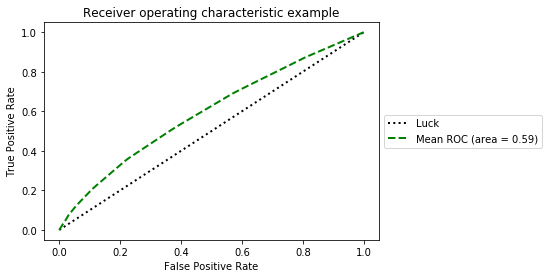

--- Mean ROC (area = 0.59)

Confusion Matrix: 
 [[8179  522]
 [2257  334]]


In [242]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=seed)
cvscores = []
conf_mat = [[0,0],[0,0]]
# Define a random forest classifier. By convention, clf means 'classifier'
clf = RandomForestClassifier(n_estimators=10,n_jobs=12)

# plotting ROC
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2
i = 0
    
for (train, test), color in zip(kfold.split(X, y), colors):
    # train random forest model
    clf.fit(X[train], y[train])
    
    # make predictions for testing set
    y_pred_class = clf.predict(X[test])
    
    # calculate testing accuracy
    score = metrics.accuracy_score(y[test], y_pred_class) * 100
    cvscores.append(score)
    print("acc: ",score,"%")
    cm = []
    cm = metrics.confusion_matrix(y[test], y_pred_class)
    conf_mat = conf_mat + cm
        
    # Compute ROC curve and area the curve
    probas_ = clf.predict_proba(X[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
#    plt.plot(fpr, tpr, lw=lw, color=color,
#             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i += 1
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# plot AUC and ROC
plt.plot([0, 1], [0, 1], linestyle='dotted', lw=lw, color='k',
         label='Luck')

mean_tpr /= kfold.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend()
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
#plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5) )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
plt.show()
print('--- Mean ROC (area = %0.2f)' % mean_auc)
print()
print("Confusion Matrix: \n", conf_mat)
clf.fit(X, y)
importance = clf.feature_importances_
#importance = pd.DataFrame(importance, index=X_disp.columns, columns=["Importance"])
feature_importances = pd.DataFrame(importance,
                                   index = X_disp.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

In [243]:
feature_importances
print(feature_importances)

                                        importance
Convert_GPA_Fix                           0.251309
ACTC                                      0.148467
Size                                      0.095117
Rank                                      0.083946
Percentile                                0.072699
Age                                       0.034014
Gender_F                                  0.027605
FIN_AID_INTEREST_Y                        0.024402
1stGeneration                             0.024235
Pell                                      0.020668
Ethnicity_White                           0.020004
College_Liberal Arts & Social Sciences    0.015101
Region Description_Out of State           0.014966
College_Science and Health                0.014950
College_Commerce                          0.014423
Ethnicity_Hispanic                        0.013124
Region Description_Suburban Southwest     0.011857
College_Computer Science                  0.011715
Region Description_Suburban Nor

acc:  76.95167286245353 %
acc:  77.47077577045695 %
acc:  77.04569606801275 %
acc:  76.99256110520723 %
acc:  77.09883103081829 %
acc:  76.92716640085061 %
77.08% (+/- 0.18%)


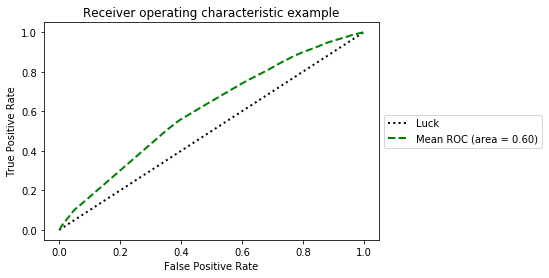

--- Mean ROC (area = 0.60)

Confusion Matrix: 
 [[8676   25]
 [2563   28]]


In [244]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=seed)
cvscores = []
conf_mat = [[0,0],[0,0]]
# define decision tree model
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99, max_depth=4, min_samples_leaf=20)

# plotting ROC
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2
i = 0
    
for (train, test), color in zip(kfold.split(X, y), colors):
    # train logistic regression model
    dt.fit(X[train], y[train])
    
    # make predictions for testing set
    y_pred_class = dt.predict(X[test])
    
    # calculate testing accuracy
    score = metrics.accuracy_score(y[test], y_pred_class) * 100
    cvscores.append(score)
    print("acc: ",score,"%")
    cm = []
    cm = metrics.confusion_matrix(y[test], y_pred_class)
    conf_mat = conf_mat + cm
        
    # Compute ROC curve and area the curve
    probas_ = dt.predict_proba(X[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
#    plt.plot(fpr, tpr, lw=lw, color=color,
#             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i += 1
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# plot AUC and ROC
plt.plot([0, 1], [0, 1], linestyle='dotted', lw=lw, color='k',
         label='Luck')

mean_tpr /= kfold.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend()
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
#plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5) )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
plt.show()
print('--- Mean ROC (area = %0.2f)' % mean_auc)
print()
print("Confusion Matrix: \n", conf_mat)

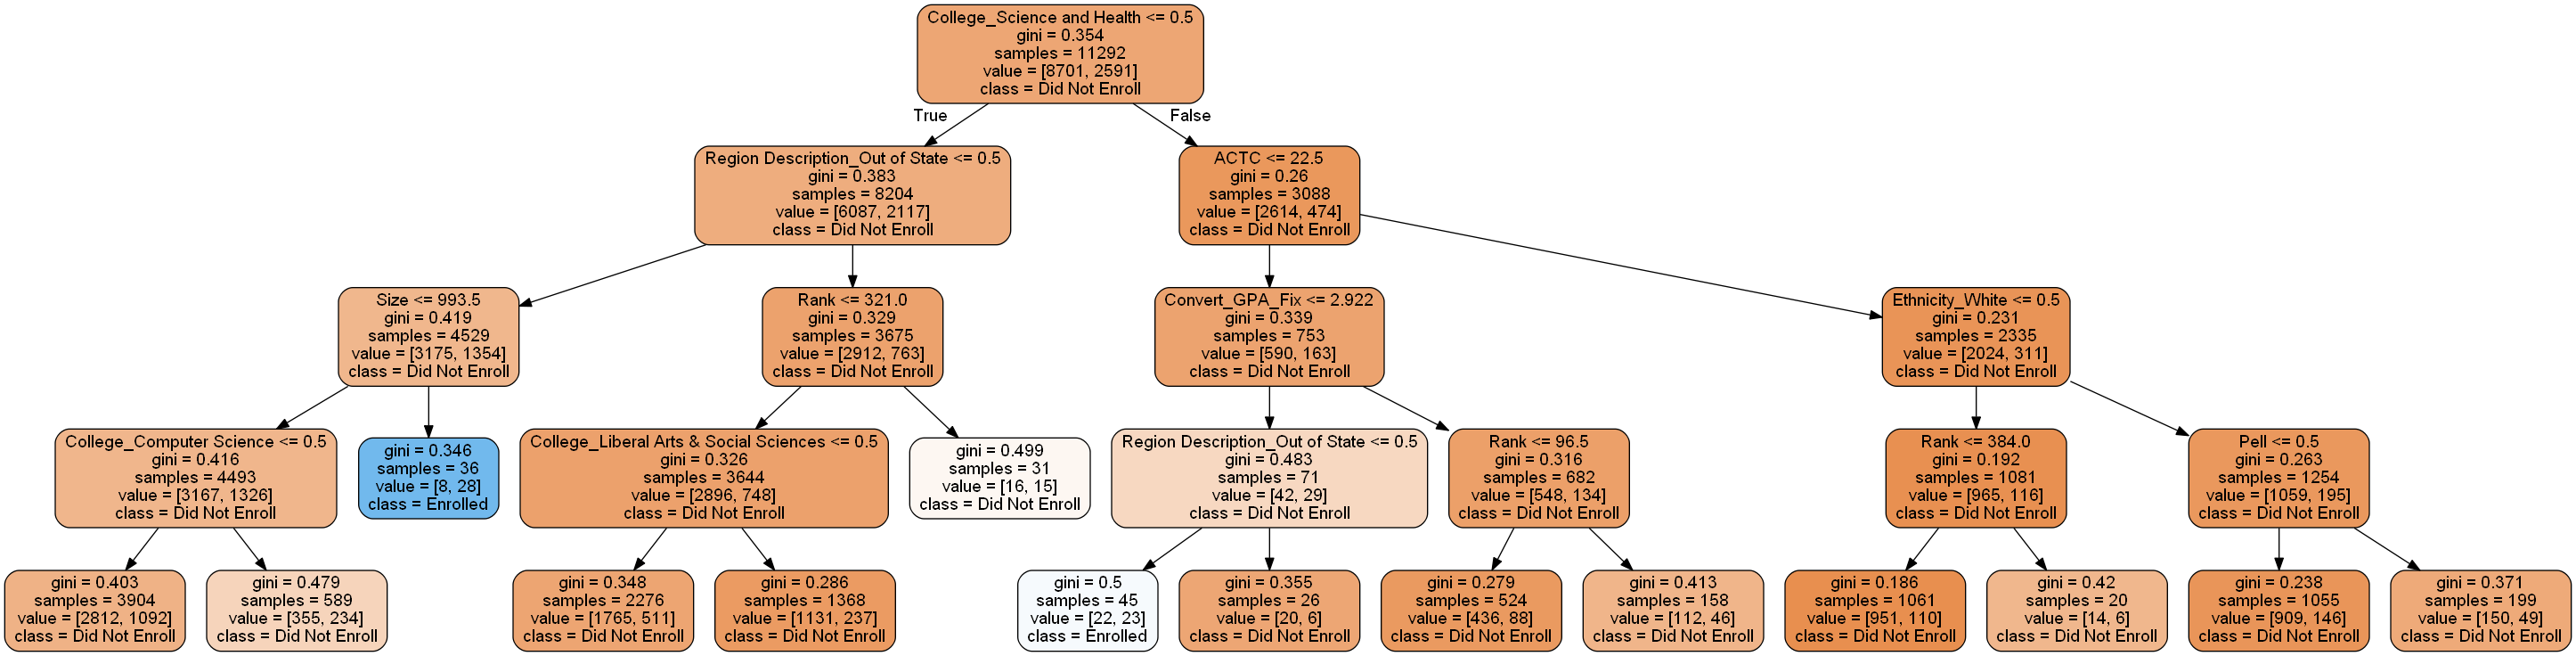

In [245]:
dt.fit(X,y)
dot_data = StringIO()
target_list = np.array(['Did Not Enroll','Enrolled'])
tree.export_graphviz(dt, out_file=dot_data, 
                     filled=True, 
                     rounded=True, 
                     feature_names=feature_cols,                      
                     class_names=target_list)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

acc:  76.57992565055763 %
acc:  76.62061636556854 %
acc:  76.99256110520723 %
acc:  77.1519659936238 %
acc:  77.25823591923485 %
acc:  77.1398192450824 %
76.96% (+/- 0.26%)


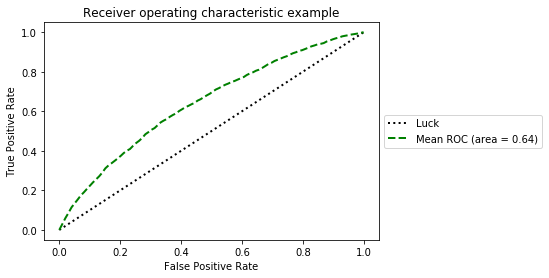

--- Mean ROC (area = 0.64)

Confusion Matrix: 
 [[8621   80]
 [2522   69]]


In [246]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define 6-fold cross validation test harness
kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=seed)
cvscores = []
conf_mat = [[0,0],[0,0]]
# define logistic regression model
logreg = LogisticRegression(C=1e9)

# plotting ROC
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2
i = 0
    
for (train, test), color in zip(kfold.split(X, y), colors):
    # train logistic regression model
    logreg.fit(X[train], y[train])
    
    # make predictions for testing set
    y_pred_class = logreg.predict(X[test])
    
    # calculate testing accuracy
    score = metrics.accuracy_score(y[test], y_pred_class) * 100
    cvscores.append(score)
    print("acc: ",score,"%")
    cm = []
    cm = metrics.confusion_matrix(y[test], y_pred_class)
    conf_mat = conf_mat + cm
        
    # Compute ROC curve and area the curve
    probas_ = logreg.predict_proba(X[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
#    plt.plot(fpr, tpr, lw=lw, color=color,
#             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i += 1
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# plot AUC and ROC
plt.plot([0, 1], [0, 1], linestyle='dotted', lw=lw, color='k',
         label='Luck')

mean_tpr /= kfold.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend()
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
#plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5) )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
plt.show()
print('--- Mean ROC (area = %0.2f)' % mean_auc)
print()
print("Confusion Matrix: \n", conf_mat)

In [247]:
logreg.fit(X, y)
equation = (list(zip(logreg.coef_[0],feature_cols)))
print("intercept:", logreg.intercept_)
equation

intercept: [-0.16082825]


[(-0.039729991055628126, 'Convert_GPA_Fix'),
 (-0.01979928085547493, 'ACTC'),
 (6.218718257020696e-05, 'Size'),
 (0.0010611676755944116, 'Rank'),
 (-0.002871179901132407, 'Percentile'),
 (-0.020335740529245864, 'Age'),
 (-0.15832899033319017, 'FIN_AID_INTEREST_Y'),
 (0.15283528329752677, '1stGeneration'),
 (0.34318096175170953, 'Pell'),
 (0.38905179918092264, 'Ethnicity_White'),
 (-0.09691782345612626, 'Gender_F'),
 (-0.2420412929226555, 'Region Description_Out of State'),
 (0.03297745477172413, 'Ethnicity_Hispanic'),
 (0.15367749918661583, 'Region Description_Suburban West'),
 (-0.6931819069471532, 'College_Science and Health'),
 (-0.10121404648174326, 'College_Liberal Arts & Social Sciences'),
 (-0.2981046878774157, 'Major_UGRD Undeclared TBD'),
 (0.31808517096607725, 'Region Description_Suburban Southwest'),
 (0.002475138892272058, 'Ethnicity_Asian/Pacific Islander'),
 (-0.16969677881369624, 'College_Commerce'),
 (0.35285495179072085, 'College_Computer Science'),
 (0.761651752338528

In [248]:
print(logreg.intercept_)

[-0.16082825]


In [249]:
#hie_df_en.columns = hie_df_en.columns.str.replace(' ', '_')
#hie_df_en.columns = hie_df_en.columns.str.replace('/', '_')
#hie_df_en.columns = hie_df_en.columns.str.replace('&', 'and')
#hie_df_en.columns = hie_df_en.columns.str.replace('1st', 'First')
#print(list(hie_df_en))

In [250]:

#hie_logreg = logit("Enroll ~ Convert_GPA_Fix + ACTC + Size + Rank + Percentile + Age + FIN_AID_INTEREST_Y + FirstGeneration + Pell + Ethnicity_White + Gender_F + Region_Description_Out_of_State + Ethnicity_Hispanic + Region_Description_Suburban_West + College_Science_and_Health + College_Liberal_Arts_and_Social_Sciences + Major_UGRD_Undeclared_TBD + Region_Description_Suburban_Southwest + Ethnicity_Asian_Pacific_Islander + College_Commerce + College_Computer_Science + Major_Accountancy + Ethnicity_Not_Applicable + Region_Description_Suburban_North + Region_Description_Chicago_North + Ethnicity_Black + Region_Description_Suburban_Northwest + Region_Description_Suburban_South + Ethnicity_Multiracial", hie_df_en).fit()